<a href="https://colab.research.google.com/github/Sush1999foz/DS201-Mid-Course-Summative-Assignment/blob/main/Summative_Assignment_copy_of_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping on Naukri.com**


Contribution - Individual

Member - SUSHMA FOZDAR

# **Github**

https://github.com/Sush1999foz/DS201-Mid-Course-Summative-Assignment/tree/main

# **Overview:**

Data Science job insights is a comprehensive tool designed to assist data science professionals, job seekers, and recruiters in navigating the dynamic field of data science job opportunities . this tool utilizes advanced web scraping methods and data analysis to collect, assess , and  present data science job postings from diverse online platforms. its goal is to offer valuable information about job demand fluctuations, preferred qualifications, and emerging skill requirements for a better understanding of the industry.

# **Key Features:**

**1. Adaptable Web Scraping:**
     

*   Dynamic website Adaptation: The tool will intelligently adapt to evolving website structures, ensuring it coonsistently collects job listings as websites change.
*   Multi-Platform Scraping: it scrapes data science job postings from various online platfroms, such as Linkdin jobs, indeed , Naukri, Glassdor , and AngelList, with customizable platfrom selection.

*   Scheduled Updates : Implement a scheduled job scraping feature to maintain up -to-date data.











**2. Data Symphony:**


*   Data Extraction: Extract critical information from job listings, including job titles, company names, job descriptions, qualifications, salaries, locations,and application deadlines.

*   Data Cleansing: Clean the extracted data to eliminate duplicates, inconsistencies, and irrelevent information.
*   Data Organization: Store the extracted data in a structured database for efficient retrieval and analysis.


**3. Market Wizardry:**


*   Demand Insights: Analyze job posting data to uncover data science job demand trends, including industries with increasing demand, preferred qualifications, and emerging job roles.

*   Geographic Distribution : Visualize job opportunities geographically,highlighting areas with the highest concentrations of data science jobs.

*   Salary Analysis: Create visualizations illustrating salary variations based on experience, location, and job type , aiding users in understanding salary differences various regions and industries.
*   Preferred Qualifications: Identify the most common qualifications and skills mentioned in job seekers in understanding what skills are in high demand.


*   Emerging Skills: Employ natural language proessing (NPL) techinques to pinpoint emerging skills and technologies mentioned in job descriptions.



**4. Visual Magic:**


*   Interactive Dashboards: Develop interactive dashboards featuring charts, graphs, and visual representations to offer users a comprehensive view of the job market.Users can filter data by location, experience level, or industry.

*   Job Search and Alerts: Enable users to search for specific job titles, locations, or companies, and set up email alerts for new job listings matching their criteria.

# **Technology Stack:**



*   **Web Scraping :** Utilizes python with libraries like Scrapy and BeautifulSoup for efficient web scraping.

*   **Data Storage**: Structured data is stored in either MySQL or PostgreSQL databases.
*   **Data Analysis:** Employs python with libraries such as Pandas,Matplotlib, and seaborn for thorough data analysis and visualizations.


*  **Web Application** : The user-friendly web interface is build using either flask or Django for robust web application development.

*   **Frontend:** HTML, CSS , and JavaScript are employed to create interactive and responsive visualization , enhancing the user experience .
* **Hosting**: The application can be hosted on cloud platfroms like AWS, Azure, or Heroku for scalability and accessibility.







# **Impact:**

Data science job tracker delivers significant benefits to the data science community:


1.   **Empowering Professionals:**  
     
     DataScience job tracker provides real time insights into the data science job market, empowering professionals to make informed career decisions.
      

2.   **Enhancing job Seeker Success:**

      Job seekers benefit from easy access to relevant job listings and emerging skill trends, increasing their chances of securing their desired positions.
2.  **Supporting Recruiters**:
    
    Recruiters stay informed about industry trends, enabling them to identify the most qualified candidates for their organizations.


4. **Bridging  the Gap**:

    The tool's data- driven approach serves as a bridge between job seekers and employers, ultimately benefiting the data science community as a whole.

1.   **Room for Expansion:**

    DatascienceJobTracker not only meets the challenge's core objectives but also has the potential's for continuose improvement and expansion to cater to landscape , ensuing long-term relevance and utility.





# **Project Objective**

The objective of this scraping project is to extract job posting from Naukri.com, a job aggregator website . This will be achieved through the use of Python libraries such as requests , BeautifulSoup, and Selenium . The project aims to collect relevent job data from Naukri.com, allowing for furhter analysis or integration into a broader data science or job tracking tool.

# **Let's Begin!**

In [ ]:
!pip install selenium
!pip install parsel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [ ]:
pip install requests

In [ ]:
pip install html5lib

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

# Replace this with the actual URL of the job listings page
url = 'https://www.linkedin.com/jobs/search/?currentJobId=3693535231&geoId=102713980&keywords=data%20science&location=India&origin=JOBS_HOME_SEARCH_BUTTON&refresh=true'

# Send an HTTP GET request to the URL# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all job listings
    job_listings = soup.find_all('div', class_='base-search-card')

    # Create lists to store the extracted data
    job_titles = []
    company_names = []
    locations = []
    descriptions = []
    qualifications_list = []
    salaries = []
    deadlines = []

    # Loop through each job listing and extract the desired information
    for job_listing in job_listings:
        # Extract job title
        job_title = job_listing.find('h3', class_='base-search-card__title').text.strip()
        job_titles.append(job_title)

        # Extract company name
        company_name = job_listing.find('h4', class_='base-search-card__subtitle').text.strip()
        company_names.append(company_name)

        # Extract location
        location = job_listing.find('span', class_='job-search-card__location').text.strip()
        locations.append(location)

        # Extract the job description (if available)
        description = job_listing.find('div', class_='description')
        if description:
            description = description.text.strip()
        else:
            description = "Description not available"
        descriptions.append(description)

        # Extract qualifications (if available)
        qualifications_data = job_listing.find('div', class_='qualifications')
        if qualifications_data:
            qualifications = qualifications_data.text.strip()
        else:
            qualifications = "Qualifications not available"
        qualifications_list.append(qualifications)

        # Extract salary (if available)
        salary_data = job_listing.find('div', class_='salary')
        if salary_data:
            salary = salary_data.text.strip()
        else:
            salary = "Salary not available"
        salaries.append(salary)

        # Extract deadline (if available)
        deadline_data = job_listing.find('time', class_='job-search-card__listdate')
        if deadline_data:
            deadline = deadline_data['datetime']
        else:
            deadline = "Deadline not available"
        deadlines.append(deadline)

    # Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame({
        'Job Title': job_titles,
        'Company Name': company_names,
        'Location': locations,
        'Description': descriptions,
        'Qualifications': qualifications,
        'Salary': salaries,
        'Deadline': deadlines
    })

    # Print the DataFrame
    print(df)

else:
    print("Failed to retrieve the web page. Status code:", response.status_code)



                   Job Title             Company Name  \
0             Data Scientist                PwC India   
1             Data Scientist               KPMG India   
2             DATA SCIENTIST                Microsoft   
3             Data Scientist                 Deloitte   
4           Business Analyst  Curefit - house of cult   
5       Operations Executive                 Flipkart   
6             Data Scientist                  Infosys   
7   Associate Data Scientist          Tesco Bengaluru   
8               Data Science                  Infosys   
9            Product Analyst               MakeMyTrip   
10          Business Analyst               MakeMyTrip   
11           Product Analyst  Curefit - house of cult   
12       Data Analyst Intern              Volvo Group   
13            Data Scientist        Tata Technologies   
14            Data Scientist  L&T Technology Services   
15            Data Scientist              ICICIdirect   
16            Data Scientist   

In [ ]:
df.head()

,Job Title,Company Name,Location,Description,Qualifications,Salary,Deadline
0,Data Scientist,PwC India,"Bengaluru, Karnataka, India",Description not available,Qualifications not available,Salary not available,2023-11-17
1,Data Scientist,KPMG India,"Mumbai, Maharashtra, India",Description not available,Qualifications not available,Salary not available,2023-12-14
2,DATA SCIENTIST,Microsoft,"Bengaluru, Karnataka, India",Description not available,Qualifications not available,Salary not available,2023-12-09
3,Data Scientist,Deloitte,"Gurugram, Haryana, India",Description not available,Qualifications not available,Salary not available,2023-11-27
4,Business Analyst,Curefit - house of cult,"Delhi, India",Description not available,Qualifications not available,Salary not available,2023-11-17


In [ ]:
#since the data is not available we are deleting the 3 columns from df
df = df.drop(['Description', 'Qualifications', 'Salary'], axis=1)

In [ ]:
df

,Job Title,Company Name,Location,Deadline
0,Data Scientist,PwC India,"Bengaluru, Karnataka, India",2023-11-17
1,Data Scientist,KPMG India,"Mumbai, Maharashtra, India",2023-12-14
2,DATA SCIENTIST,Microsoft,"Bengaluru, Karnataka, India",2023-12-09
3,Data Scientist,Deloitte,"Gurugram, Haryana, India",2023-11-27
4,Business Analyst,Curefit - house of cult,"Delhi, India",2023-11-17
5,Operations Executive,Flipkart,"Bengaluru, Karnataka, India",2023-11-28
6,Data Scientist,Infosys,"Bengaluru East, Karnataka, India",2023-12-07
7,Associate Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",2023-12-08
8,Data Science,Infosys,"Bengaluru East, Karnataka, India",2023-11-21
9,Product Analyst,MakeMyTrip,"Gurugram, Haryana, India",2023-12-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Job Title     24 non-null     object        
 1   Company Name  24 non-null     object        
 2   Location      24 non-null     object        
 3   Deadline      23 non-null     datetime64[ns]
 4   Year-Month    23 non-null     period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 1.1+ KB


In [ ]:
df.describe()

<ipython-input-31-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Job Title,Company Name,Location,Deadline,Year-Month
count,24,24,24,23,23
unique,23,23,11,21,5
top,Data Scientist,Jar,"Bengaluru, Karnataka, India",2023-11-04 00:00:00,2023-11
freq,2,2,8,2,10
first,NaN,NaN,NaN,2023-07-13 00:00:00,NaN
last,NaN,NaN,NaN,2023-12-14 00:00:00,NaN


In [ ]:
# Task 1: Job Demand Trends
# Count the number of job postings by job title
job_demand_trends = df['Job Title'].value_counts()
job_demand_trends

Data Scientist                                                     2
Data Research Analyst                                              1
Data Analyst / Data Scientist (Fresher)                            1
data scientist                                                     1
ML Engineer                                                        1
Data Engineer                                                      1
Product Analyst                                                    1
ML Ops                                                             1
Data Scientist - Python/Machine Learning                           1
Data Scientist for Gwalior                                         1
Jr. Data Scientist                                                 1
Data Science                                                       1
Data Analyst - R/Python                                            1
DATA ANALYST (SQL,Python, Aws)                                     1
Senior Role - Business Intelligenc

In [ ]:
# Task 2: Geographic Distribution
# Count the number of job postings by location
geographic_distribution = df['Location'].value_counts()
geographic_distribution

Bengaluru, Karnataka, India          8
Mumbai, Maharashtra, India           4
India                                3
Pune, Maharashtra, India             2
Delhi, India                         1
Bengaluru North, Karnataka, India    1
Noida, Uttar Pradesh, India          1
Gwalior, Madhya Pradesh, India       1
Chennai, Tamil Nadu, India           1
Hyderabad, Telangana, India          1
Bangalore Urban, Karnataka, India    1
Name: Location, dtype: int64

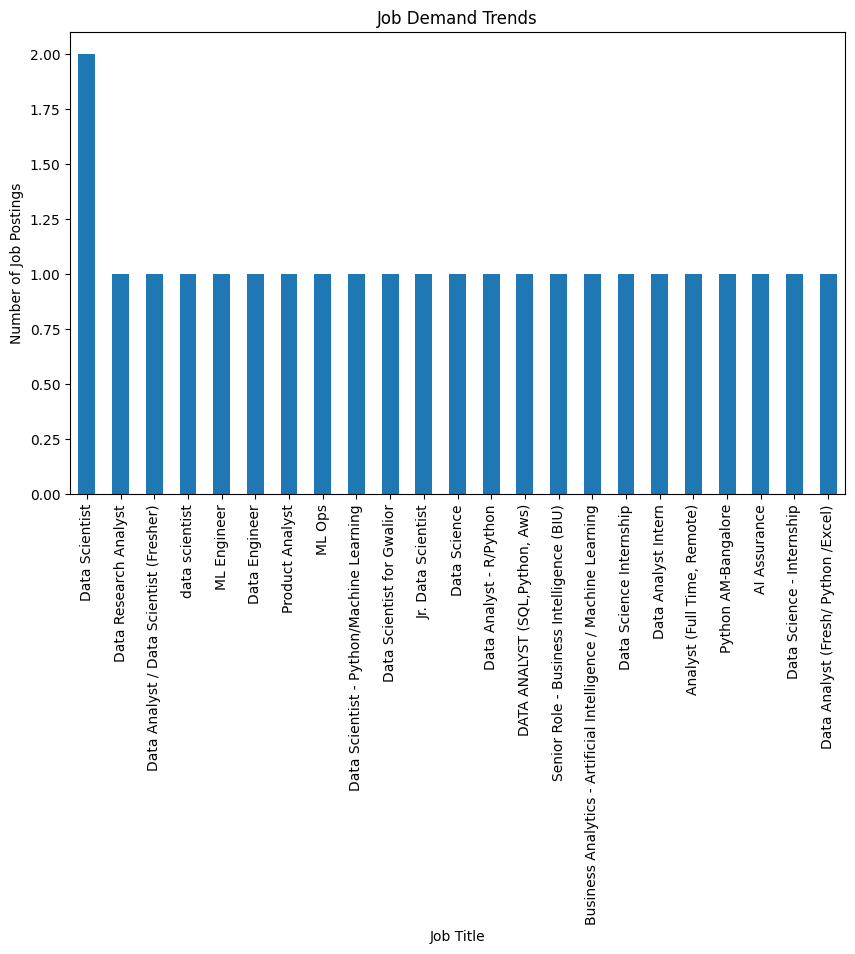

In [ ]:
# Visualization

# Plot Job Demand Trends
plt.figure(figsize=(10, 6))
job_demand_trends.plot(kind='bar')
plt.title("Job Demand Trends")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()


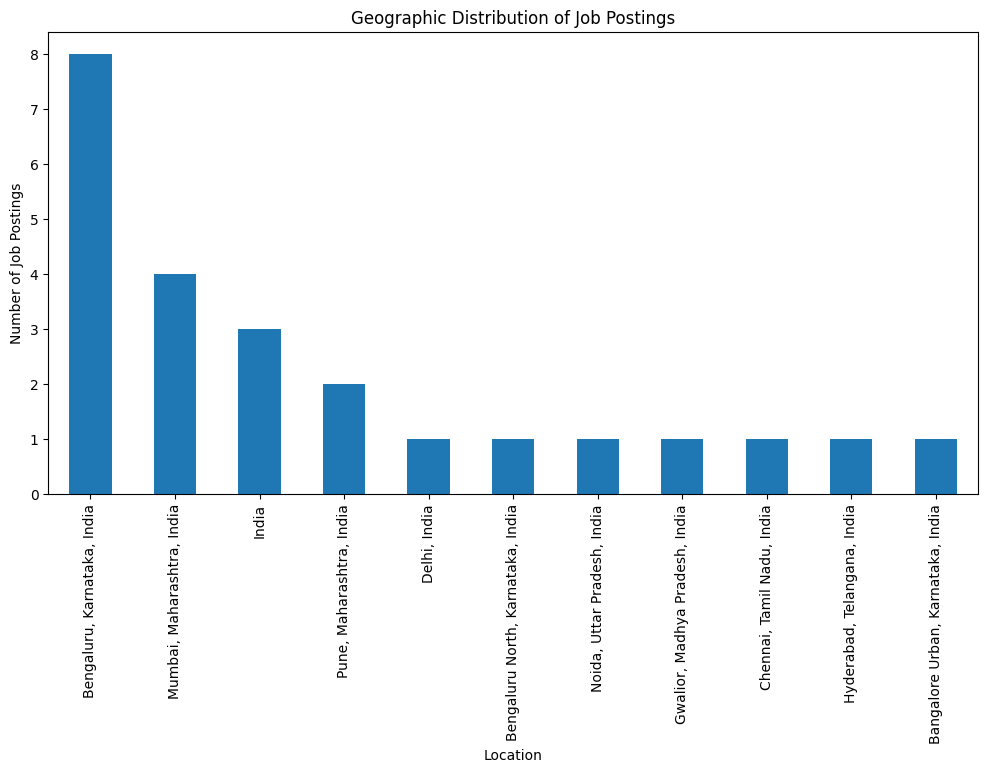

In [ ]:
# Plot Geographic Distribution
plt.figure(figsize=(12, 6))
geographic_distribution.plot(kind='bar')
plt.title("Geographic Distribution of Job Postings")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()

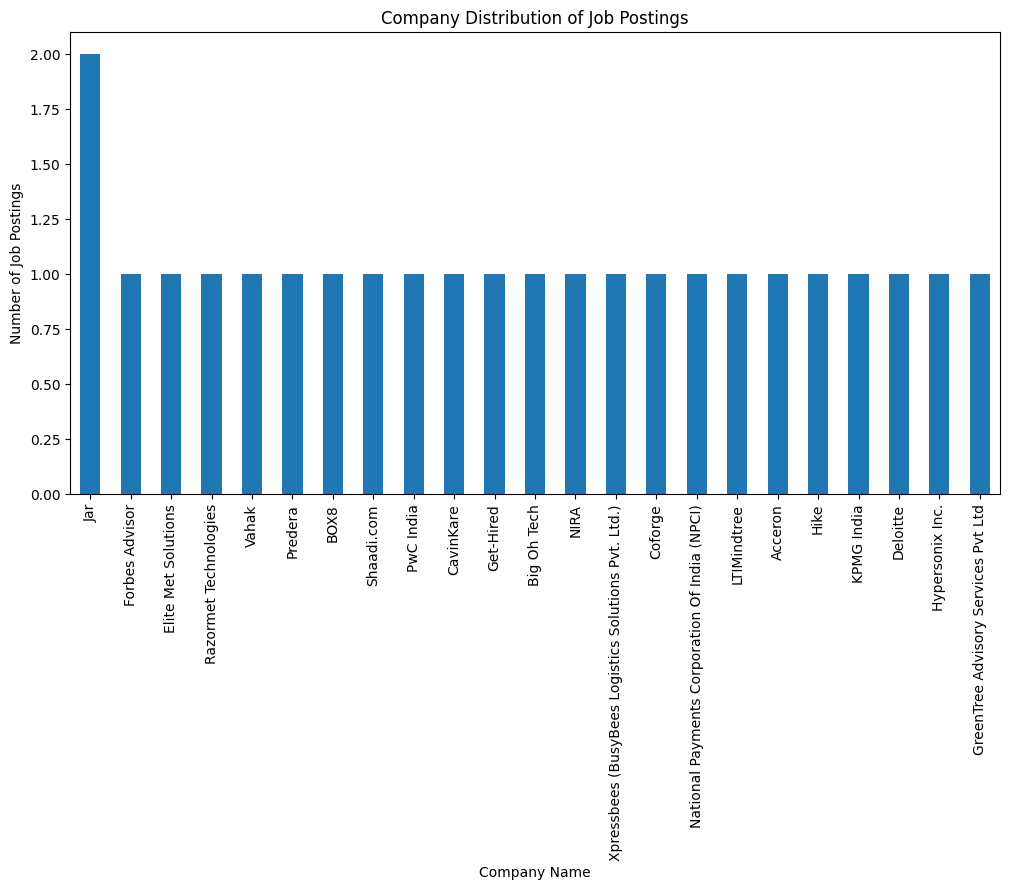

In [ ]:
#Company Distribution:Visualize the distribution of job postings among different companies to see which companies have the most job openings.
company_distribution = df['Company Name'].value_counts()
plt.figure(figsize=(12, 6))
company_distribution.plot(kind='bar')
plt.title("Company Distribution of Job Postings")
plt.xlabel("Company Name")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()

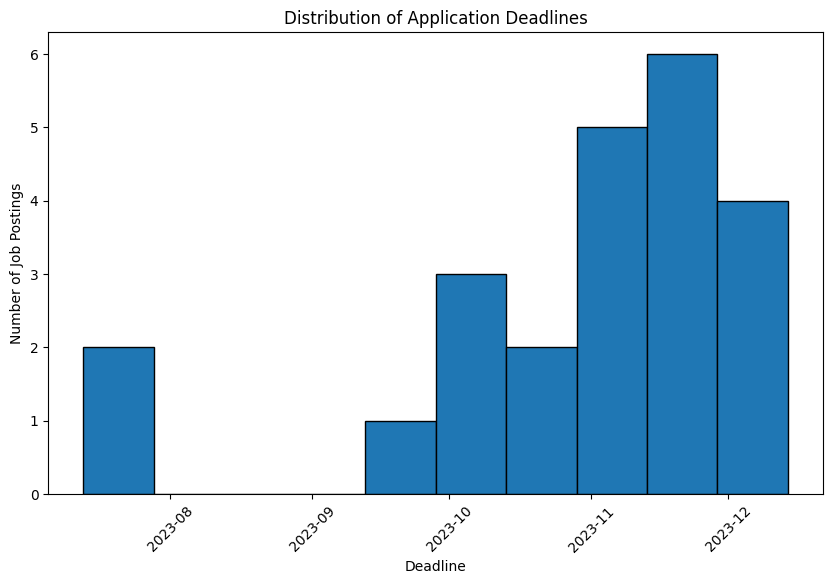

In [ ]:
#Application Deadlines:Create a histogram to visualize the distribution of application deadlines. This can help you understand the urgency of job postings.

# Convert the 'Deadline' column to datetime format
df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['Deadline'], bins=10, edgecolor='k')
plt.title("Distribution of Application Deadlines")
plt.xlabel("Deadline")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.show()


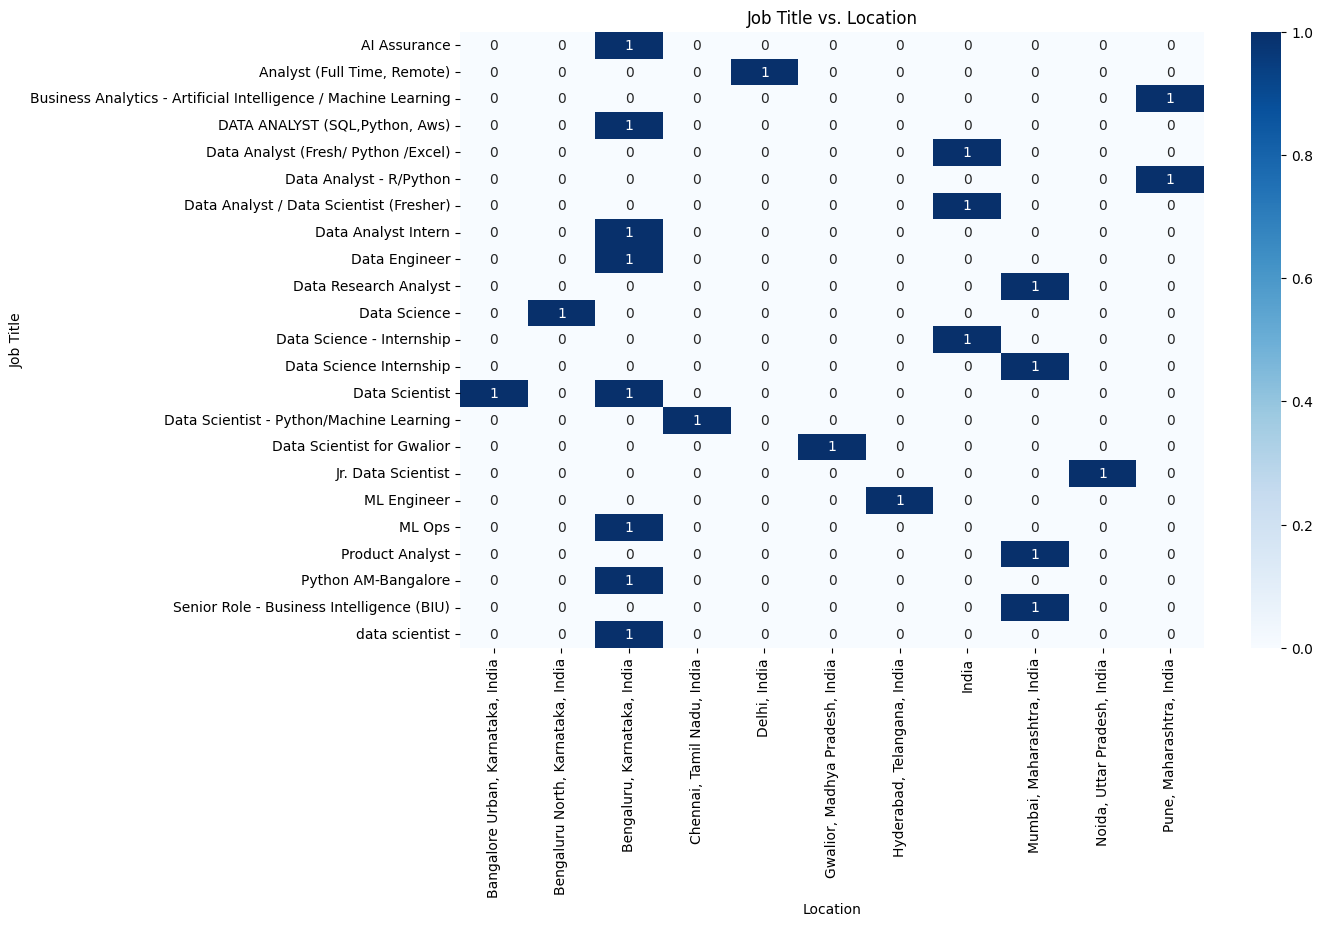

In [ ]:
#Job Title vs. Location:Create a heatmap to visualize which job titles are most prevalent in different locations. This can reveal regional job preferences.

job_location_counts = df.groupby(['Job Title', 'Location']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(job_location_counts, cmap='Blues', annot=True, fmt='d')
plt.title("Job Title vs. Location")
plt.xlabel("Location")
plt.ylabel("Job Title")
plt.xticks(rotation=90)
plt.show()


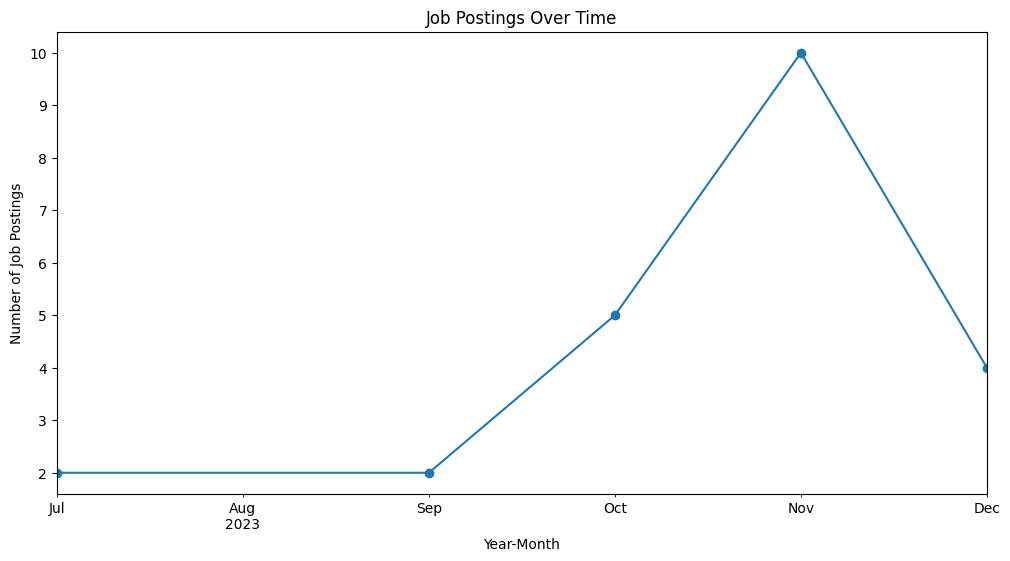

In [ ]:
#Time-Based Analysis:If you have data over a longer period, you can visualize trends in job postings over time to see if there are any seasonal patterns.


df['Year-Month'] = df['Deadline'].dt.to_period('M')
time_based_counts = df.groupby('Year-Month').size()

plt.figure(figsize=(12, 6))
time_based_counts.plot(kind='line', marker='o')
plt.title("Job Postings Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.show()


# **Conclusion**

Web scraping is indeed a powerful technique for efficiently extracting data from websites, particularly when dealing with large datasets. This project demonstrated the ability to collect data from multiple pages by automating the process through loops and URL parameter adjustments, making it possible to seamlessly gather information from numerous pages.

The internet contains a vast wealth of data, but much of it is not readily available in easily accessible formats. When data is too extensive to be collected manually, web scraping emerges as a valuable tool for data retrieval and analysis. It enables access to and utilization of online data for various purposes, including research, business intelligence, and decision-making.

Web scraping offers not only time-saving benefits but also the automation of repetitive tasks, making it an indispensable skill for data professionals and researchers. However, it's essential to approach web scraping ethically and responsibly by adhering to website terms of service and legal regulations. This ensures the integrity and legality of the data extraction process, maintaining a balance between data accessibility and the rights of website owners.